In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from ipywidgets import interactive, IntSlider
from itertools import product as p

In [2]:
size_l = [
    5000,
    10000,
    15000,
    20000,
]

In [3]:
# Set `res_d`, `network_l`, `num_neurons_d`
base = "/data/sls/temp/johnmwu/contextual-corr-analysis/results12-"
res_fname = {size : "{0}{1}_rbfcka".format(base, size) for size in 
                size_l}

res_d = {}
for size in size_l:
    with open(res_fname[size], 'rb') as f:
        res_d[size] = pickle.load(f)

# RBFCKA

In [4]:
res_df_d = {}
for size in size_l:
    res_df_d[size] = pd.DataFrame(res_d[size]["similarities"])
    res_df_d[size] = res_df_d[size].reindex(res_df_d[size].columns)

In [5]:
# Set `meanabs_df`, `std_df`
diffs = {size: {} for size in size_l}
meanabss = {size : {} for size in size_l}
stds = {size : {} for size in size_l}
for s1, s2 in p(size_l, size_l):
    diffs[s1][s2] = (res_df_d[s1] - res_df_d[s2]).to_numpy()
    meanabss[s1][s2] = np.nanmean(np.abs(diffs[s1][s2]))
    stds[s1][s2] = np.nanstd(diffs[s1][s2])

meanabs_df = pd.DataFrame(meanabss)
std_df = pd.DataFrame(stds)

In [6]:
meanabs_df

,5000,10000,15000,20000
5000,0.000000,0.011602,0.014264,0.016801
10000,0.011602,0.000000,0.004903,0.007092
15000,0.014264,0.004903,0.000000,0.003625
20000,0.016801,0.007092,0.003625,0.000000


In [7]:
std_df

,5000,10000,15000,20000
5000,0.000000,0.009752,0.009092,0.009666
10000,0.009752,0.000000,0.004593,0.004221
15000,0.009092,0.004593,0.000000,0.003160
20000,0.009666,0.004221,0.003160,0.000000


### Heatmap

In [8]:
def rbfcka_update(size):
    fname = "temp_rbfcka_{0}".format(size)
    try:
        plt.imshow(fname)
    except:
        df = res_df_d[size]
        sns.heatmap(df.fillna(1), vmin=0, vmax=1)
        # sns.heatmap(df.fillna(1), )
        plt.savefig(fname)
    
    plt.show()

In [9]:
plt.rcParams["figure.figsize"] = (20,15)
slider = IntSlider(5000, 5000, 20000, 5000)
interactive(rbfcka_update, size=slider)

interactive(children=(IntSlider(value=5000, description='size', max=20000, min=5000, step=5000), Output()), _d…

# Misc

/usr/users/johnmwu/anaconda3/envs/jmw0/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/users/johnmwu/anaconda3/envs/jmw0/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


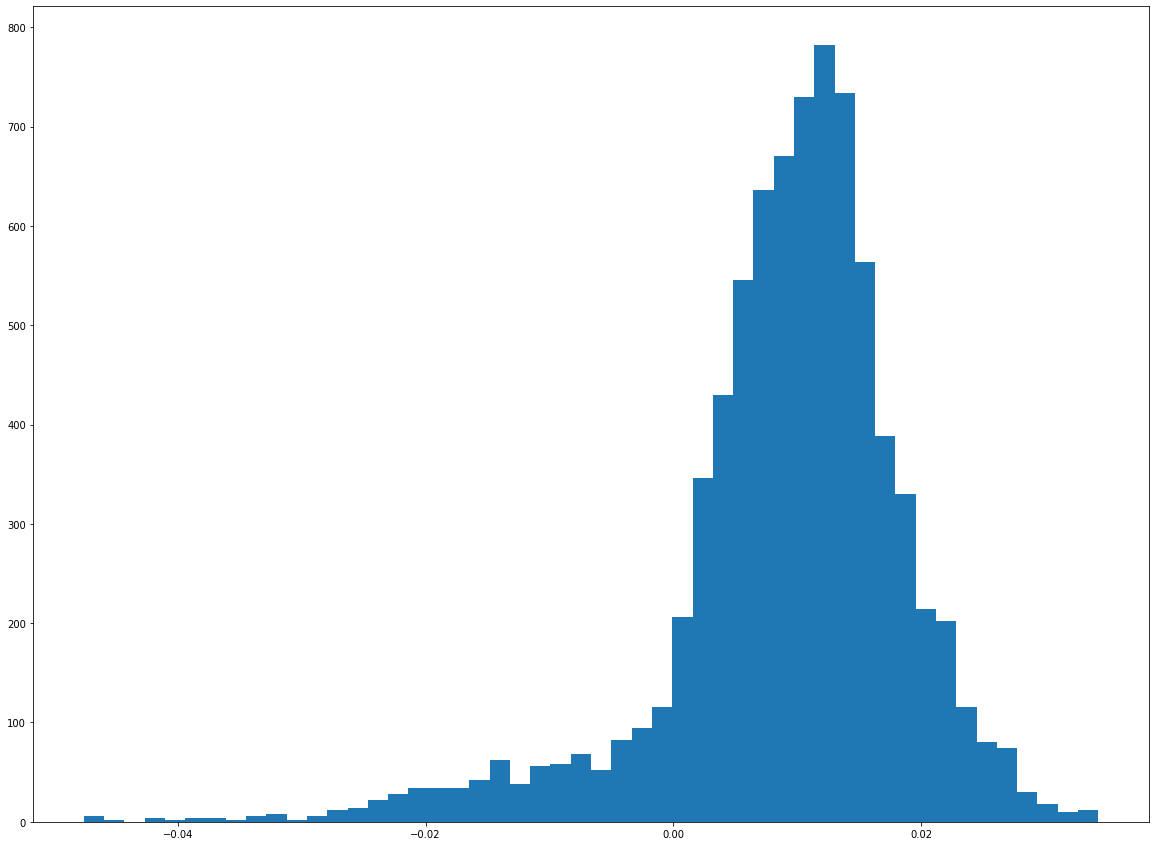

In [10]:
plt.hist((res_df_d[5000] - res_df_d[10000]).to_numpy().ravel(), bins=50)
plt.show()

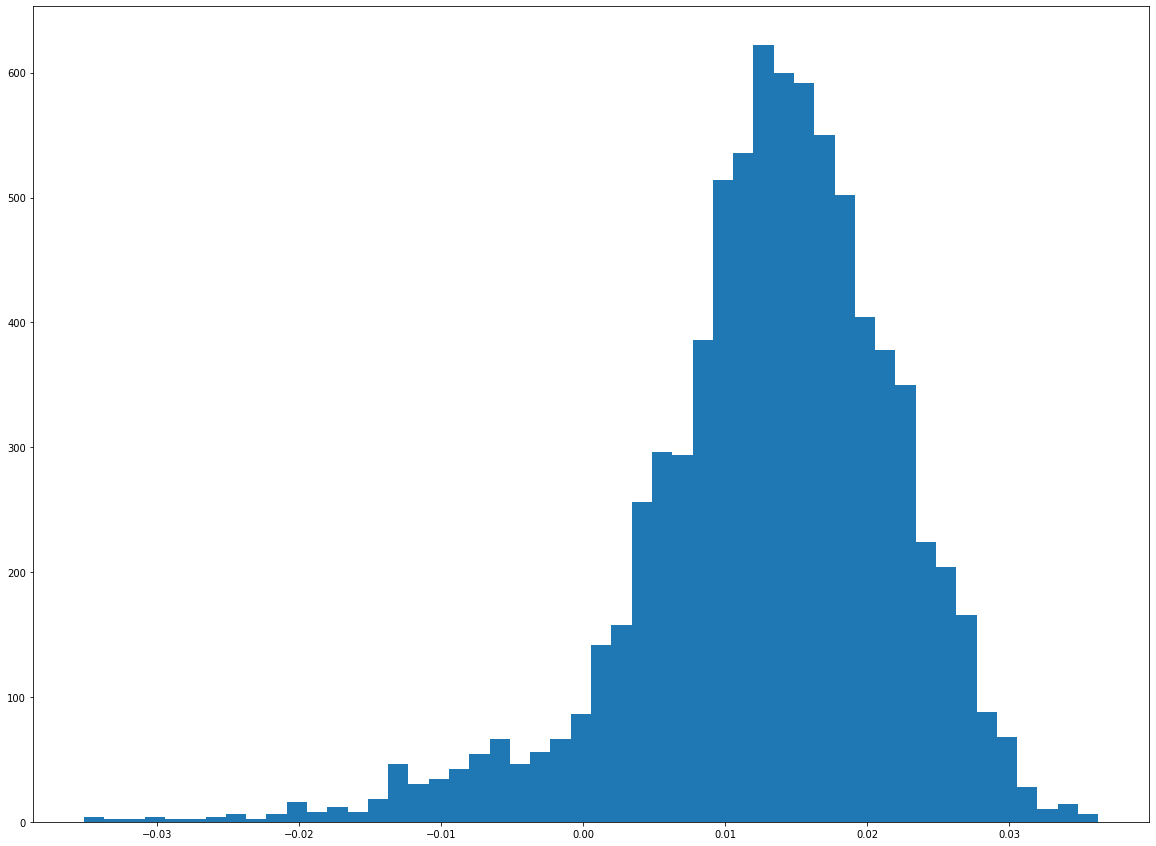

In [11]:
plt.hist((res_df_d[5000] - res_df_d[15000]).to_numpy().ravel(), bins=50)
plt.show()

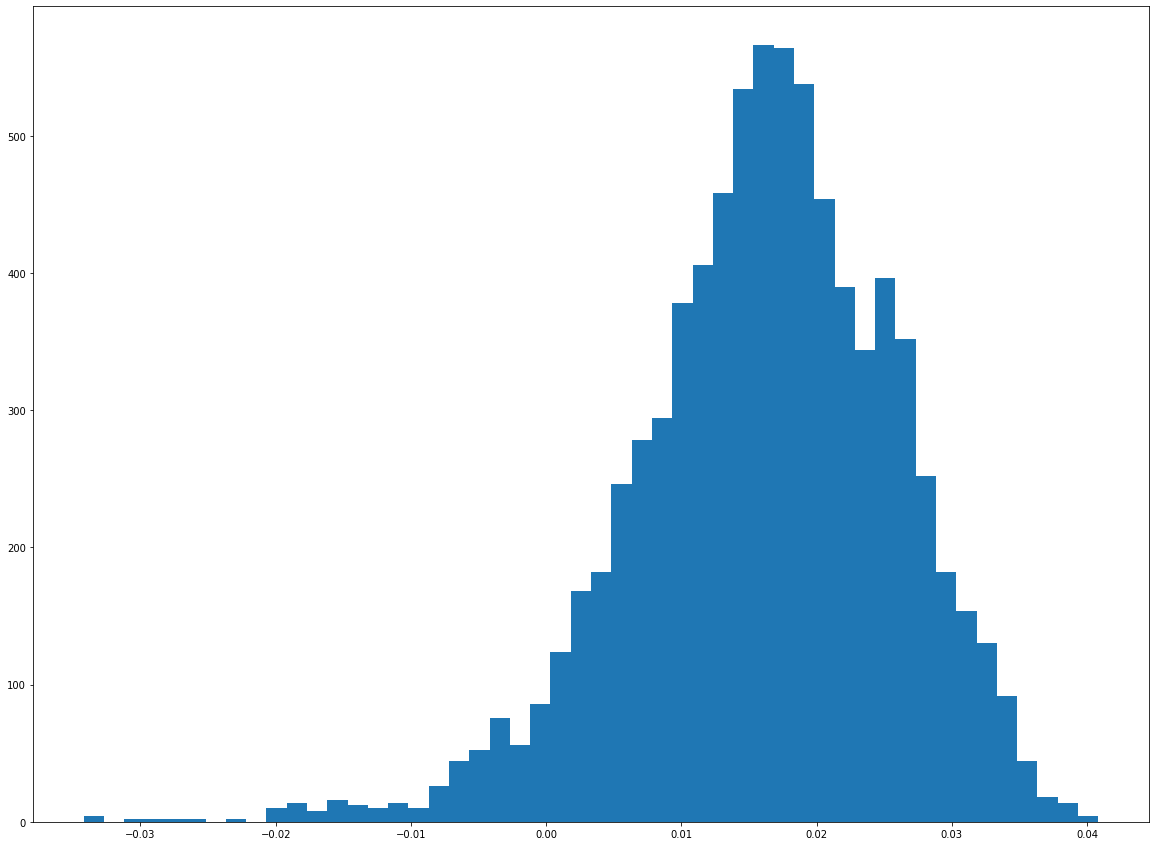

In [12]:
plt.hist((res_df_d[5000] - res_df_d[20000]).to_numpy().ravel(), bins=50)
plt.show()